In [1]:
import seaborn
import pandas as pd

In [2]:
def get_raw_data():
    confirmed_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    recovered_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    death_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    return confirmed_df, recovered_df, death_df

In [3]:
def get_country_data_running_total(data, columnName, countryName):
    country_data = data.loc[data['Country/Region'] == countryName]
    country_time_series_only = country_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    transposed = country_time_series_only.transpose()
    transposed = pd.DataFrame({
        columnName: transposed.sum(axis=1)
    })
    return transposed

In [4]:
def get_country_confirmed_recovered_death_running_total_data(confirmed_df, recovered_df, death_df, countryName):
    country_confirmed = get_country_data_running_total(confirmed_df, "Confirmed", countryName)
    country_recovered = get_country_data_running_total(recovered_df, "Recovered", countryName)
    country_death = get_country_data_running_total(death_df, "Death", countryName)
    country_all = country_confirmed
    country_all["Recovered"] = country_recovered.Recovered
    country_all["Death"] = country_death.Death
    return country_all

In [5]:
def get_US_running_total(confirmed_df, recovered_df, death_df):
    us_data = get_country_confirmed_recovered_death_running_total_data(
        confirmed_df,
        recovered_df,
        death_df,
        "US")
    return us_data

In [6]:
confirmed_df, recovered_df, death_df = get_raw_data()

In [7]:
us_only = get_US_running_total(confirmed_df, recovered_df, death_df)
us_only

,Confirmed,Recovered,Death
1/22/20,1,0,0
1/23/20,1,0,0
1/24/20,2,0,0
1/25/20,2,0,0
1/26/20,5,0,0
...,...,...,...
5/6/20,1229331,189910,73455
5/7/20,1257023,195036,75662
5/8/20,1283929,198993,77180
5/9/20,1309550,212534,78795


In [8]:
new_numbers = us_only.diff().dropna()
new_numbers[-14:]

,Confirmed,Recovered,Death
4/27/20,22412.0,4436.0,1338.0
4/28/20,24385.0,4512.0,2136.0
4/29/20,27327.0,4784.0,2612.0
4/30/20,29515.0,33227.0,2029.0
5/1/20,34037.0,10068.0,1947.0
5/2/20,29078.0,11367.0,1426.0
5/3/20,25501.0,4770.0,1313.0
5/4/20,22335.0,7028.0,1240.0
5/5/20,23976.0,2611.0,2142.0
5/6/20,24980.0,119.0,2391.0


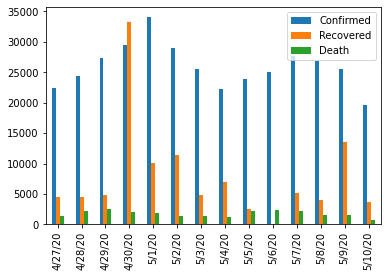

In [9]:
new_numbers[-14:].plot(kind='bar')

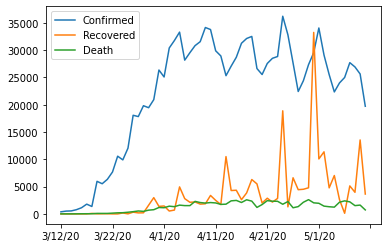

In [10]:
new_numbers[-60:].plot()

Looking at the daily changes

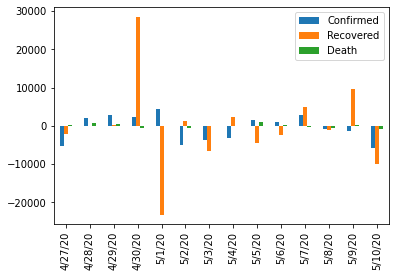

In [238]:
new_numbers.diff()[-14:].plot(kind='bar')

Adding 14 days rolling average for new confirmed cases.

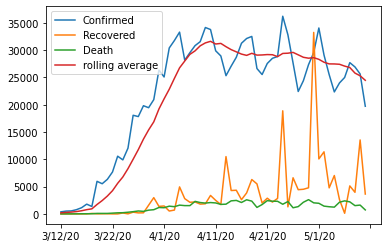

In [239]:
new_numbers['rolling average'] = new_numbers.Confirmed.rolling(7).mean()
new_numbers = new_numbers.dropna()
new_numbers[-60:].plot()

In [240]:
new_numbers[-14:]

,Confirmed,Recovered,Death,rolling average
4/27/20,22412.0,4436.0,1338.0,29124.428571
4/28/20,24385.0,4512.0,2136.0,28673.857143
4/29/20,27327.0,4784.0,2612.0,28508.285714
4/30/20,29515.0,33227.0,2029.0,28607.714286
5/1/20,34037.0,10068.0,1947.0,28300.428571
5/2/20,29078.0,11367.0,1426.0,27769.285714
5/3/20,25501.0,4770.0,1313.0,27465.000000
5/4/20,22335.0,7028.0,1240.0,27454.000000
5/5/20,23976.0,2611.0,2142.0,27395.571429
5/6/20,24980.0,119.0,2391.0,27060.285714


In [241]:
new_numbers['rolling average'].diff()[-14:]

4/27/20    -443.571429
4/28/20    -450.571429
4/29/20    -165.571429
4/30/20      99.428571
5/1/20     -307.285714
5/2/20     -531.142857
5/3/20     -304.285714
5/4/20      -11.000000
5/5/20      -58.428571
5/6/20     -335.285714
5/7/20     -260.428571
5/8/20    -1018.714286
5/9/20     -493.857143
5/10/20    -827.285714
Name: rolling average, dtype: float64

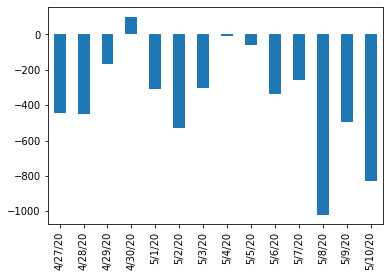

In [242]:
new_numbers['rolling average'].diff()[-14:].plot(kind='bar')

Relation Plot using seaborn

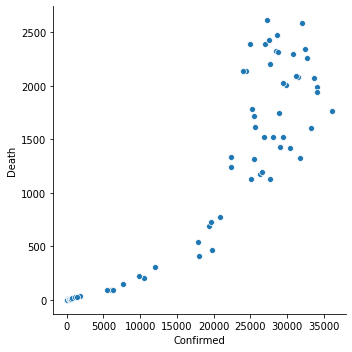

In [243]:
seaborn.relplot(x='Confirmed', y='Death', data=new_numbers)

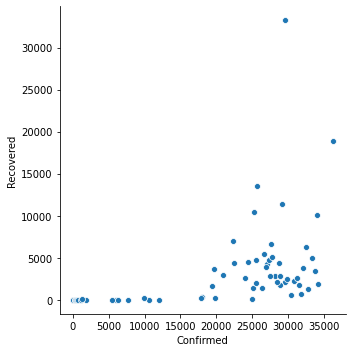

In [244]:
seaborn.relplot(x='Confirmed', y='Recovered', data=new_numbers)

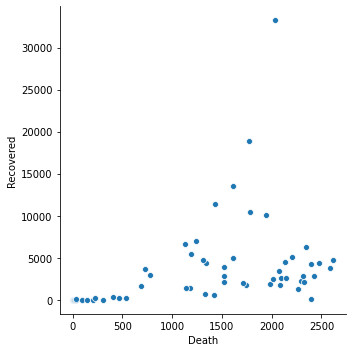

In [245]:
seaborn.relplot(x='Death', y='Recovered', data=new_numbers)